In [1]:
from jenga.tasks.shoes import ShoeCategorizationTask
from jenga.corruptions.image import GaussianNoiseCorruption, MotionBlurCorruption, FogCorruption, BrightnessCorruption

from jenga.evaluation.corruption_impact import CorruptionImpactEvaluator

import matplotlib.pyplot as plt

import imgaug.augmenters as iaa

Using TensorFlow backend.


### Instantiate the shoe categorization task and train a baseline model

In [2]:
task = ShoeCategorizationTask(seed=42)

baseline_model = task.fit_baseline_model(task.train_data, task.train_labels)

4423680/4422102 [==============================] - 1s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
12000/12000 [==============================] - 10s 833us/sample - loss: 0.1644 - acc: 0.9372


### Train another model on data augmented with gaussian noise corruptions 

In [3]:
import numpy as np

augmented_data = [task.train_data]
augmented_labels= [task.train_labels]

for severity in range(1, 6):
    indexes = np.random.choice(range(0, len(task.train_data)), 2400)
    sample = task.train_data[indexes, :, :].copy()
    corrupted_sample = GaussianNoiseCorruption(fraction=1.0, severity=severity).transform(sample)
    augmented_data.append(corrupted_sample)
    augmented_labels.append(task.train_labels[indexes].copy())

gaussian_noise_model = task.fit_baseline_model(np.concatenate(augmented_data), 
                                               np.concatenate(augmented_labels))


24000/24000 [==============================] - 20s 823us/sample - loss: 0.1712 - acc: 0.9312


### Evaluate how well both models can handle corrupted test data

In [4]:
evaluator = CorruptionImpactEvaluator(task)

corruptions  = []
for fraction in [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]:
    corruptions.append(GaussianNoiseCorruption(fraction=fraction, severity=4))
    
gaussian_noise_results = evaluator.evaluate(baseline_model, 10, *corruptions)        
gaussian_noise_results_aug = evaluator.evaluate(gaussian_noise_model, 10, *corruptions)    

0/70 (0.6609609999999861)
10/70 (7.375179000000003)
20/70 (14.353520000000003)
30/70 (21.894346999999982)
40/70 (31.181786999999986)
50/70 (42.78151199999999)
60/70 (56.650476999999995)
0/70 (0.6054120000000012)
10/70 (7.062217000000004)
20/70 (14.940179)
30/70 (22.67990599999999)
40/70 (32.379549)
50/70 (44.063777999999985)
60/70 (57.755416999999994)


### Train another model on data augmented with motion blur corruptions 

In [5]:
import numpy as np

augmented_data = [task.train_data]
augmented_labels= [task.train_labels]

for severity in range(1, 6):
    indexes = np.random.choice(range(0, len(task.train_data)), 2400)
    sample = task.train_data[indexes, :, :].copy()
    corrupted_sample = MotionBlurCorruption(fraction=1.0, severity=severity).transform(sample)
    augmented_data.append(corrupted_sample)
    augmented_labels.append(task.train_labels[indexes].copy())

motion_blur_model = task.fit_baseline_model(np.concatenate(augmented_data), 
                                            np.concatenate(augmented_labels))

24000/24000 [==============================] - 21s 857us/sample - loss: 0.1858 - acc: 0.9303


### Evaluate how well both models can handle corrupted test data

In [6]:
evaluator = CorruptionImpactEvaluator(task)

corruptions  = []
for fraction in [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]:
    corruptions.append(MotionBlurCorruption(fraction=fraction, severity=4))
    
motion_blur_results = evaluator.evaluate(baseline_model, 10, *corruptions)        
motion_blur_results_aug = evaluator.evaluate(motion_blur_model, 10, *corruptions)    

0/70 (0.7180569999999875)
10/70 (8.176355000000001)
20/70 (17.893361000000027)
30/70 (30.939771000000007)
40/70 (50.148056999999994)
50/70 (80.53554300000002)
60/70 (121.69533600000005)
0/70 (0.7250739999999496)
10/70 (8.000704999999925)
20/70 (18.423169999999914)
30/70 (31.898855000000026)
40/70 (51.26669700000002)
50/70 (82.34317799999997)
60/70 (122.81741199999999)


### Train another model on data augmented with fog corruptions 

In [7]:
import numpy as np

augmented_data = [task.train_data]
augmented_labels= [task.train_labels]

for severity in range(1, 6):
    indexes = np.random.choice(range(0, len(task.train_data)), 2400)
    sample = task.train_data[indexes, :, :].copy()
    corrupted_sample = FogCorruption(fraction=1.0, severity=severity).transform(sample)
    augmented_data.append(corrupted_sample)
    augmented_labels.append(task.train_labels[indexes].copy())

fog_model = task.fit_baseline_model(np.concatenate(augmented_data), 
                                    np.concatenate(augmented_labels))

24000/24000 [==============================] - 19s 798us/sample - loss: 0.2096 - acc: 0.9173


### Evaluate how well both models can handle corrupted test data

In [8]:
evaluator = CorruptionImpactEvaluator(task)

corruptions  = []
for fraction in [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]:
    corruptions.append(FogCorruption(fraction=fraction, severity=4))
    
fog_results = evaluator.evaluate(baseline_model, 10, *corruptions)        
fog_results_aug = evaluator.evaluate(fog_model, 10, *corruptions)   

0/70 (0.7553169999999909)
10/70 (8.355723000000012)
20/70 (17.19362799999999)
30/70 (27.806149000000005)
40/70 (42.206969999999956)
50/70 (62.35116699999992)
60/70 (88.37097199999994)
0/70 (0.6459979999999632)
10/70 (7.607313999999974)
20/70 (16.238458000000037)
30/70 (26.43098599999996)
40/70 (40.998852000000056)
50/70 (65.730503)
60/70 (105.20918100000006)


### Plot the results

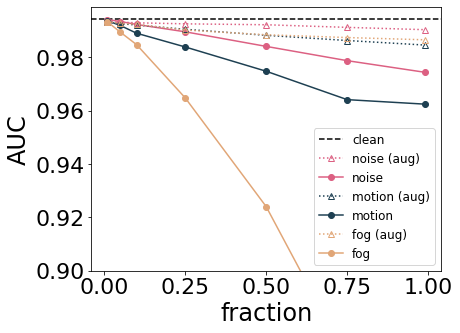

In [9]:
def as_series(results):
    medians = []
    for result in results:
        medians.append(np.median(result.corrupted_scores))
    return medians

ax = plt.gca()        

fractions = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99]
markersize=6

l = ax.axhline(gaussian_noise_results[0].baseline_score, linestyle='--', color='black')    

plt.plot(fractions, as_series(gaussian_noise_results_aug), color='#dc6082', linestyle='dotted', 
         marker='^', markersize=markersize, fillstyle='none')
plt.plot(fractions, as_series(gaussian_noise_results), color='#dc6082', 
         marker='o', markersize=markersize)

plt.plot(fractions, as_series(motion_blur_results_aug), color='#1e4052', linestyle='dotted', 
         marker='^', markersize=markersize, fillstyle='none')
plt.plot(fractions, as_series(motion_blur_results), color='#1e4052', 
         marker='o', markersize=markersize)

plt.plot(fractions, as_series(fog_results_aug), color='#e1a677', linestyle='dotted', 
         marker='^', markersize=markersize, fillstyle='none')
plt.plot(fractions, as_series(fog_results), color='#e1a677', 
         marker='o', markersize=markersize)


ax.set_ylim((0.9, 0.999))
ax.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='both', which='minor', labelsize=22)    
ax.set_ylabel('AUC', fontsize=24)
ax.set_xlabel('fraction', fontsize=24)
    
ax.legend(['clean', 'noise (aug)', 'noise', 'motion (aug)', 'motion', 'fog (aug)', 'fog'], 
          fontsize=12)    
    
plt.tight_layout()
plt.gcf().set_size_inches(7, 5)

plt.show()